In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_olympics.csv')
dataset = df.copy()
dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [4]:
dataset.shape

(70000, 15)

In [5]:
dataset.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [6]:
dataset = dataset.drop(['ID','Medal'], axis = 1)

In [7]:
dataset.dtypes

Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
dtype: object

In [8]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Height'] = dataset['Height'].fillna(dataset['Height'].mean())
dataset['Weight'] = dataset['Weight'].fillna(dataset['Weight'].mean())
dataset.isna().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
dtype: int64

In [9]:
dataset.duplicated().sum()

409

In [10]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [11]:
dataset.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight


In [12]:
dataset['Age'].mean()

25.544764271706118

In [13]:
dataset['Height'].mean()

175.50490082651393

In [14]:
dataset['Weight'].mean()

70.90031465886798

In [15]:
sns.set(style='dark')

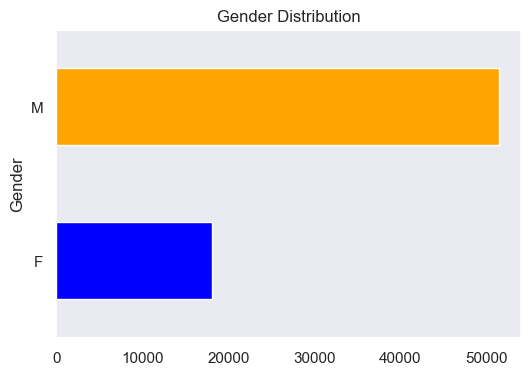

In [16]:
dataset['Sex'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(6,4), color = ['Blue', 'Orange'])
plt.title('Gender Distribution')
plt.xlabel('')
plt.ylabel('Gender')
plt.show()

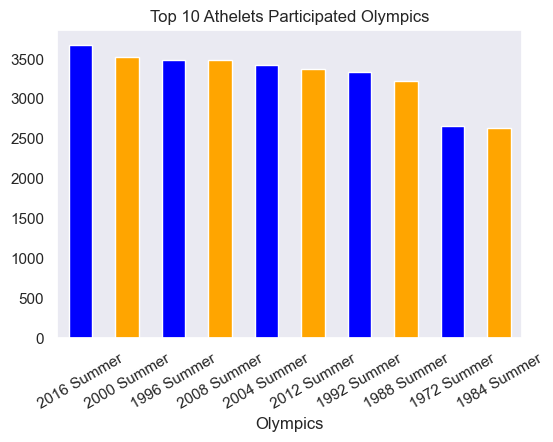

In [17]:
dataset['Games'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(6,4), color = ['Blue', 'Orange'])
plt.title('Top 10 Athelets Participated Olympics')
plt.xlabel('Olympics')
plt.ylabel('')
plt.xticks(rotation=30)
plt.show()

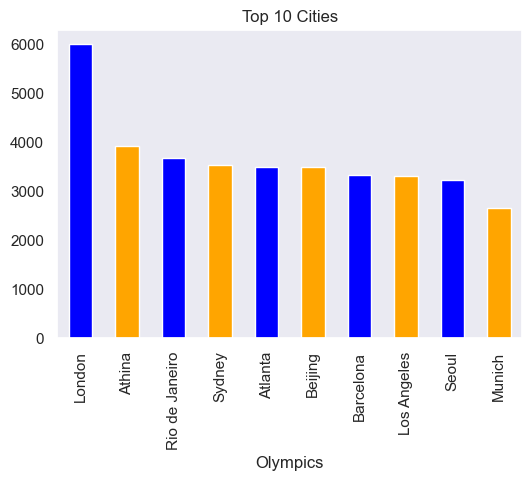

In [18]:
dataset['City'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(6,4), color = ['Blue', 'Orange'])
plt.title('Top 10 Cities')
plt.xlabel('Olympics')
plt.ylabel('')
plt.show()

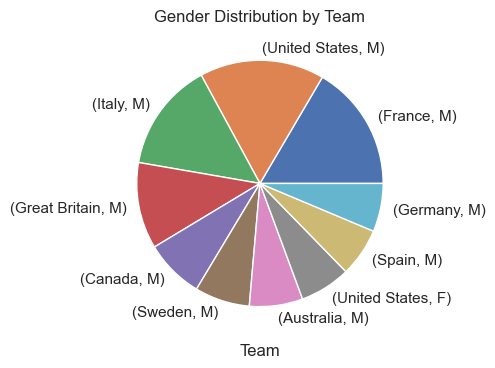

In [19]:
dataset.groupby('Team')['Sex'].value_counts().sort_values(ascending=False).head(10).plot(kind = 'pie', figsize=(6,4))
plt.title('Gender Distribution by Team')
plt.xlabel('Team')
plt.ylabel('')
plt.show()

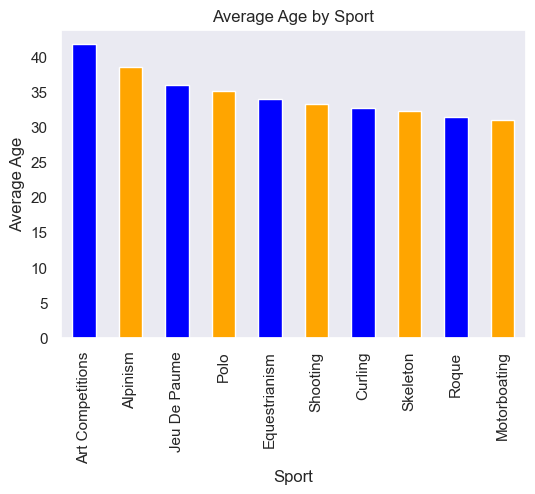

In [20]:
dataset.groupby('Sport')['Age'].mean().sort_values(ascending=False).head(10).plot(kind = 'bar', figsize = (6,4), color = ['Blue', 'Orange'])
plt.title('Average Age by Sport')
plt.xlabel('Sport')
plt.ylabel('Average Age')
plt.show()

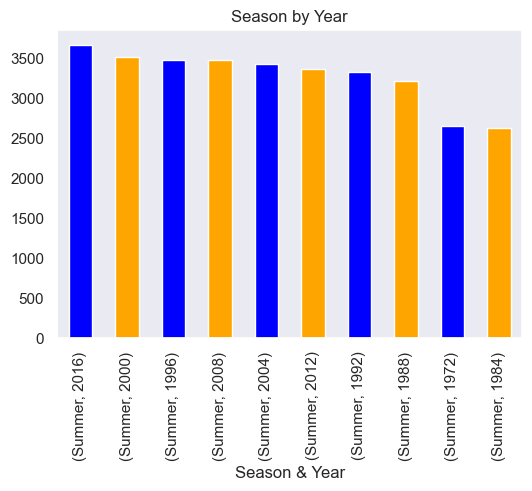

In [21]:
dataset.groupby('Season')['Year'].value_counts().sort_values(ascending=False).head(10).plot(kind = 'bar', figsize = (6,4), color = ['Blue', 'Orange'])
plt.title('Season by Year')
plt.xlabel('Season & Year')
plt.ylabel('')
plt.show()